In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
df = pd.read_csv('Sales_Data.csv')
df.head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,EB54EF1154C3A78,Heather,Callahan,Mosley-David,Lake Jeffborough,Norway,043-797-5229,915.112.1727,urangel@espinoza-francis.net,8/26/2020,http://www.escobar.org/
1,2,10dAcafEBbA5FcA,Kristina,Ferrell,"Horn, Shepard and Watson",Aaronville,Andorra,932-062-1802,(209)172-7124x3651,xreese@hall-donovan.com,4/27/2020,https://tyler-pugh.info/
2,3,67DAB15Ebe4BE4a,Briana,Andersen,Irwin-Oneal,East Jordan,Nepal,8352752061,(567)135-1918,haleybraun@blevins-sexton.com,3/22/2022,https://www.mack-bell.net/
3,4,6d350C5E5eDB4EE,Patty,Ponce,Richardson Group,East Kristintown,Northern Mariana Islands,302.398.3833,196-189-7767x770,hohailey@anthony.com,7/2/2020,https://delacruz-freeman.org/
4,5,5820deAdCF23EFe,Kathleen,Mccormick,Carson-Burch,Andresmouth,Macao,001-184-153-9683x1497,552.051.2979x342,alvaradojesse@rangel-shields.com,1/17/2021,https://welch.info/


In [ ]:
df.isnull().sum()
print("Columns before cleaning:", df.columns)

df = df.dropna(how='all')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Columns after cleaning:", df.columns) # Print columns after cleaning to check the exact name

# Assuming the column name after cleaning is 'order_date', proceed with the conversion.
# If the name is different, replace 'order_date' with the correct name found from the print output.
try:
    df['order_date'] = pd.to_datetime(df['order_date'])
except KeyError:
    print("Error: 'order_date' column not found after cleaning. Please check the printed column names above and use the correct name.")


Columns before cleaning: Index(['_______i_______n_______d_______e_______x_______',
       '_______c_______u_______s_______t_______o_______m_______e_______r_______________i_______d_______',
       '_______f_______i_______r_______s_______t_______________n_______a_______m_______e_______',
       '_______l_______a_______s_______t_______________n_______a_______m_______e_______',
       '_______c_______o_______m_______p_______a_______n_______y_______',
       '_______c_______i_______t_______y_______',
       '_______c_______o_______u_______n_______t_______r_______y_______',
       '_______p_______h_______o_______n_______e_______________1_______',
       '_______p_______h_______o_______n_______e_______________2_______',
       '_______e_______m_______a_______i_______l_______',
       '_______s_______u_______b_______s_______c_______r_______i_______p_______t_______i_______o_______n_______________d_______a_______t_______e_______',
       '_______w_______e_______b_______s_______i_______t_______e_

In [ ]:
print(df.columns)

Index(['_______i_______n_______d_______e_______x_______',
       '_______c_______u_______s_______t_______o_______m_______e_______r_______________i_______d_______',
       '_______f_______i_______r_______s_______t_______________n_______a_______m_______e_______',
       '_______l_______a_______s_______t_______________n_______a_______m_______e_______',
       '_______c_______o_______m_______p_______a_______n_______y_______',
       '_______c_______i_______t_______y_______',
       '_______c_______o_______u_______n_______t_______r_______y_______',
       '_______p_______h_______o_______n_______e_______________1_______',
       '_______p_______h_______o_______n_______e_______________2_______',
       '_______e_______m_______a_______i_______l_______',
       '_______s_______u_______b_______s_______c_______r_______i_______p_______t_______i_______o_______n_______________d_______a_______t_______e_______',
       '_______w_______e_______b_______s_______i_______t_______e_______'],
      dtype='ob

In [ ]:
# Function to clean all those weird underscores
def clean_column(name):
    return name.replace('_', '').lower().strip()

# Apply to all columns
df.columns = [clean_column(col) for col in df.columns]
print(df.columns)

Index(['index', 'customerid', 'firstname', 'lastname', 'company', 'city',
       'country', 'phone1', 'phone2', 'email', 'subscriptiondate', 'website'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['index', 'customerid', 'firstname', 'lastname', 'company', 'city',
       'country', 'phone1', 'phone2', 'email', 'subscriptiondate', 'website'],
      dtype='object')


In [ ]:
# %%
print(df.columns)
# %%
# Function to clean all those weird underscores
def clean_column(name):
    return name.replace('_', '').lower().strip()

# Apply to all columns
df.columns = [clean_column(col) for col in df.columns]
print(df.columns)
# %%
print(df.columns)
try:
    df['subscriptiondate'] = pd.to_datetime(df['subscriptiondate'])
    df['month'] = df['subscriptiondate'].dt.month_name()
    df['year'] = df['subscriptiondate'].dt.year
    monthly = df.groupby('month').size().sort_values()

    monthly.plot(kind='bar', color='skyblue', figsize=(10, 5))
    plt.title('Monthly Subscriptions')
    plt.xlabel('Month')
    plt.ylabel('Number of Signups')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
except KeyError as e:
    print(f"Error: {e}. The column was not found.")
    print("Current columns in the DataFrame:")
    print(df.columns)


Index(['Index', 'Customer Id', 'First Name', 'Last Name', 'Company', 'City',
       'Country', 'Phone 1', 'Phone 2', 'Email', 'Subscription Date',
       'Website'],
      dtype='object')
Index(['index', 'customer id', 'first name', 'last name', 'company', 'city',
       'country', 'phone 1', 'phone 2', 'email', 'subscription date',
       'website'],
      dtype='object')
Index(['index', 'customer id', 'first name', 'last name', 'company', 'city',
       'country', 'phone 1', 'phone 2', 'email', 'subscription date',
       'website'],
      dtype='object')
Error: 'subscriptiondate'. The column was not found.
Current columns in the DataFrame:
Index(['index', 'customer id', 'first name', 'last name', 'company', 'city',
       'country', 'phone 1', 'phone 2', 'email', 'subscription date',
       'website'],
      dtype='object')


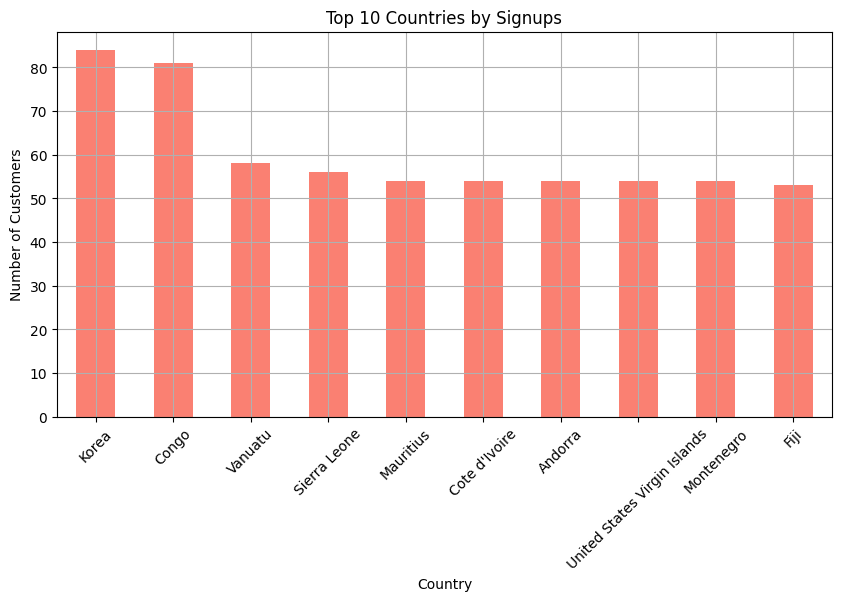

In [ ]:
country_counts = df['country'].value_counts().head(10)

country_counts.plot(kind='bar', color='salmon', figsize=(10,5))
plt.title('Top 10 Countries by Signups')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# %%
# Print columns to verify the exact name after all previous cleaning
print("Columns before accessing 'subscriptiondate':", df.columns)

try:
    # Access the column using the expected name after cleaning
    df['subscriptiondate'] = pd.to_datetime(df['subscriptiondate'])
    df['month'] = df['subscriptiondate'].dt.month_name()
    df['year'] = df['subscriptiondate'].dt.year
except KeyError as e:
    print(f"Error accessing column: {e}")
    print("Please check the printed column names above and use the correct name for the date column.")


Columns before accessing 'subscriptiondate': Index(['index', 'customer id', 'first name', 'last name', 'company', 'city',
       'country', 'phone 1', 'phone 2', 'email', 'subscription date',
       'website'],
      dtype='object')
Error accessing column: 'subscriptiondate'
Please check the printed column names above and use the correct name for the date column.


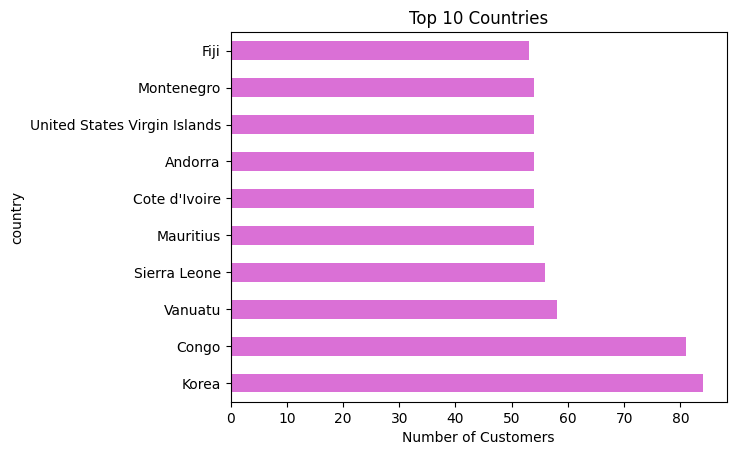

In [ ]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='orchid', title='Top 10 Countries')
plt.xlabel('Number of Customers')
plt.show()


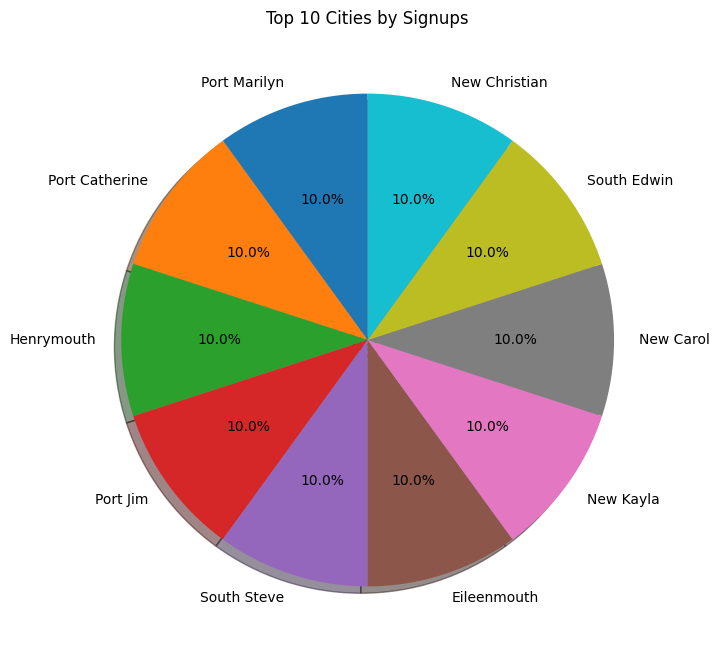

In [ ]:
city_rate = df['city'].value_counts().head(10)

# Plot as pie chart
city_rate.plot(kind='pie',
               figsize=(8,8),
               autopct='%1.1f%%',
               startangle=90,
               shadow=True,
               legend=False,
               title='Top 10 Cities by Signups')

plt.ylabel('')  # removes the y-axis label
plt.show()


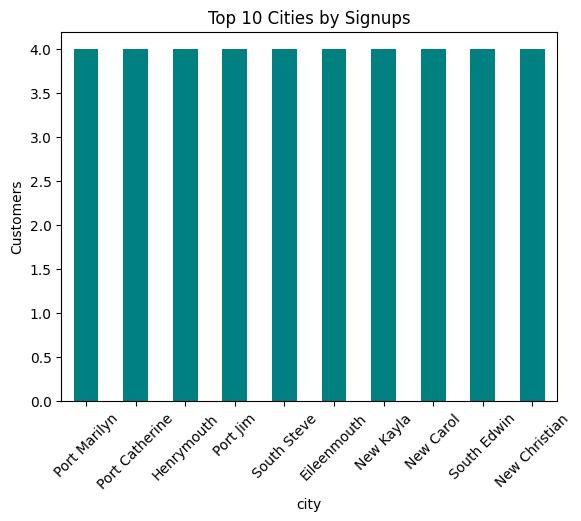

In [ ]:
city_rate = df['city'].value_counts().head(10)
city_rate.plot(kind='bar', color='teal', title='Top 10 Cities by Signups')
plt.ylabel('Customers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
top_cities = df.groupby(['country', 'city']).size().reset_index(name='count')
top_cities = top_cities.sort_values(['country', 'count'], ascending=[True, False])
top_5 = top_cities.groupby('country').head(5)
print(top_5)



          country            city  count
0     Afghanistan  Andrewschester      1
1     Afghanistan     Caitlinberg      1
2     Afghanistan       Carolstad      1
3     Afghanistan    Cesarchester      1
4     Afghanistan     Comptonbury      1
...           ...             ...    ...
9947     Zimbabwe     Barrettview      1
9948     Zimbabwe        Bradview      1
9949     Zimbabwe  Brandonborough      1
9950     Zimbabwe  Brandonchester      1
9951     Zimbabwe       Bryanstad      1

[1215 rows x 3 columns]
